In [2]:
! pip install ISLP

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 44.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 812.3/812.3 kB 57.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 65.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 69.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 14.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
from statsmodels.datasets import get_rdataset
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table
from ISLP.models import ModelSpec as MS
from sklearn.tree import (DecisionTreeClassifier as DTC,
DecisionTreeRegressor as DTR,
plot_tree,
export_text)
from sklearn.metrics import (accuracy_score,
log_loss)
from sklearn.ensemble import \
(RandomForestRegressor as RF,
GradientBoostingRegressor as GBR)
from ISLP.bart import BART

# 8.5 Applied Exercises

## Question 7. In Section 8.3.3, we applied random forests to the Boston data using max_features = 6 and using n_estimators = 100 and n_estimators = 500. Create a plot displaying the test error resulting from random forests on this data set for a more comprehensive range of values for max_features and n_estimators. You can model your plot after Figure 8.10. Describe the results obtained.

In [9]:
Boston = load_data('Boston')
X = Boston.columns.drop('medv')
predictors = X.shape[0]
y = 'medv'
X_train, X_test, y_train, y_test = skm.train_test_split(Boston[X], Boston[y], test_size =0.25, random_state = 0)

In [7]:
def getYvalue(max_features, n_estimators):
  y_val = np.array([])
  for i in range(1, n_estimators + 1, 10):
    print(i)
    boston_rf = RF(max_features = max_features, n_estimators = i , random_state = 0).fit(X_train, y_train)
    y_hat_rf = boston_rf.predict(X_test)
    y_val = np.append(y_val, np.mean((y_test - y_hat_rf)** 2))
  return y_val

In [22]:
y1 = getYvalue(predictors, 500)
y2 = getYvalue(int(np.sqrt(predictors)), 500)
y3 = getYvalue(int(np.log(predictors)), 500)
y4 = getYvalue(predictors//2, 500)


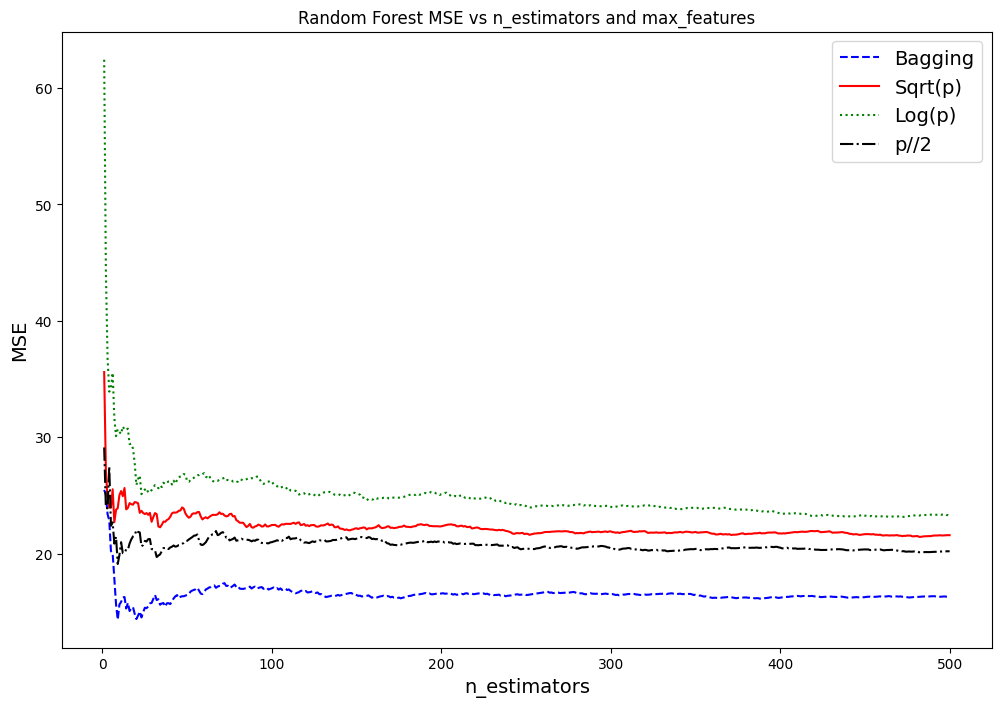

In [25]:

plt.figure(figsize = (12,8))
plt.plot(np.arange(1, 501), y1, label = 'Bagging', color = 'blue', linestyle = '--')
plt.plot(np.arange(1, 501), y2, label = 'Sqrt(p)', color = 'red', linestyle = '-')
plt.plot(np.arange(1, 501), y3, label = 'Log(p)', color = 'green', linestyle = ':')
plt.plot(np.arange(1, 501), y4, label = 'p//2', color = 'black', linestyle = '-.')
plt.legend(fontsize = 14)
plt.xlabel('n_estimators', fontsize = 14)
plt.ylabel('MSE', fontsize =14)
plt.title('Random Forest MSE vs n_estimators and max_features')
plt.show();

In [21]:
y1.shape

(500,)

## Question - 8. In the lab, a classifcation tree was applied to the Carseats data set after converting Sales into a qualitative response variable. Now we will seek to predict Sales using regression trees and related approaches, treating the response as a quantitative variable.

### (a) Split the data set into a training set and a test set

In [26]:
Carseats = load_data('Carseats')

In [30]:
Carseats['US'] = np.where(Carseats['US'] == 'Yes', 1, 0)
Carseats['Urban'] = np.where(Carseats['Urban'] == 'Yes', 1, 0)
Carseats['ShelveLoc'] = Carseats['ShelveLoc'].map({'Bad': 0, 'Medium': 1, 'Good': 2})

In [31]:
X = Carseats.columns.drop('Sales')
y = 'Sales'
X_len = X.shape[0]
X_list = list(X)
X_train, X_test, y_train, y_test = skm.train_test_split(Carseats[X], Carseats[y], test_size = 0.25, random_state =0)

### (b) Fit a regression tree to the training set. Plot the tree, and interpret the results. What test MSE do you obtain?

In [32]:
carseat_rt = DTR(random_state = 0).fit(X_train, y_train)
mse = np.mean((y_test - carseat_rt.predict(X_test))** 2)
mse

5.388343

[Text(0.5990968932215743, 0.96875, 'ShelveLoc <= 1.5\nsquared_error = 8.133\nsamples = 300\nvalue = 7.395'),
 Text(0.3228749088921283, 0.90625, 'Price <= 106.5\nsquared_error = 6.052\nsamples = 239\nvalue = 6.709'),
 Text(0.15096574344023322, 0.84375, 'Age <= 60.5\nsquared_error = 5.232\nsamples = 84\nvalue = 8.045'),
 Text(0.0723396501457726, 0.78125, 'ShelveLoc <= 0.5\nsquared_error = 4.569\nsamples = 48\nvalue = 9.011'),
 Text(0.03279883381924198, 0.71875, 'Price <= 93.0\nsquared_error = 4.413\nsamples = 14\nvalue = 7.336'),
 Text(0.016034985422740525, 0.65625, 'Education <= 10.5\nsquared_error = 2.078\nsamples = 9\nvalue = 8.43'),
 Text(0.013119533527696793, 0.59375, 'squared_error = 0.0\nsamples = 1\nvalue = 11.67'),
 Text(0.018950437317784258, 0.59375, 'Population <= 247.0\nsquared_error = 0.862\nsamples = 8\nvalue = 8.025'),
 Text(0.011661807580174927, 0.53125, 'Age <= 49.5\nsquared_error = 0.457\nsamples = 4\nvalue = 7.352'),
 Text(0.008746355685131196, 0.46875, 'Price <= 90.0\

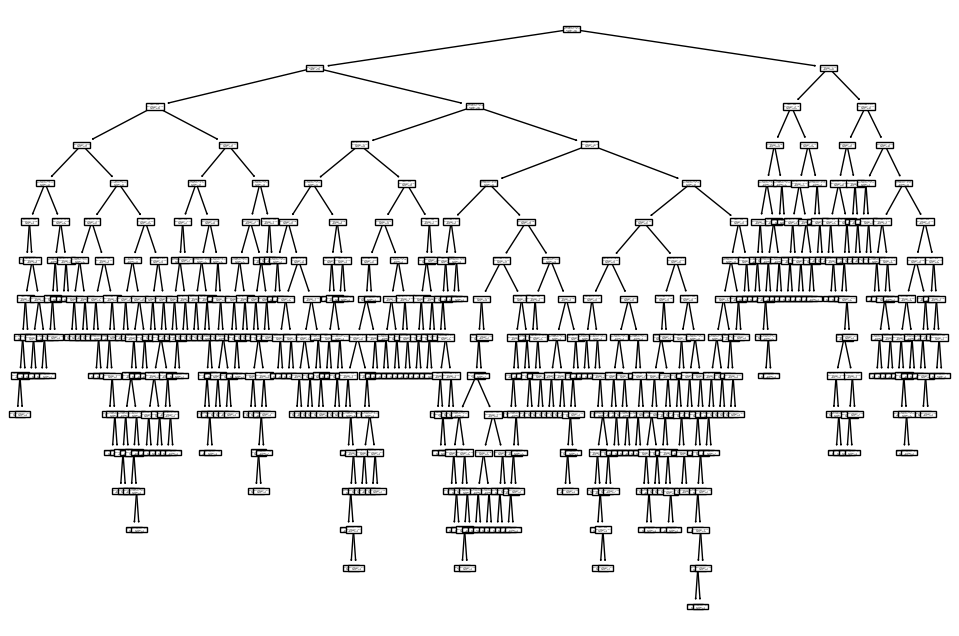

In [33]:
fig, ax = plt.subplots(figsize = (12,8))
plot_tree(carseat_rt, feature_names = X_list, ax = ax)

In [34]:
#Huge Tree since we didn't specifiy the max depth

### (c) Use cross-validation in order to determine the optimal level of tree complexity. Does pruning the tree improve the test MSE?

In [61]:
def regressionTreeCV(X_train, X_test, y_train, y_test, max_depth, folds, goal):
  carseat_rt = DTR(max_depth = max_depth, random_state = 0)
  carseat_rt.fit(X_train, y_train)
  ccp_path = carseat_rt.cost_complexity_pruning_path(X_train, y_train)
  kfold = skm.KFold(folds, random_state = 0, shuffle = True)
  term = {'ccp_alpha': ccp_path.ccp_alphas}
  grid = skm.GridSearchCV(carseat_rt, term, cv = kfold, refit = True, scoring = goal)
  grid.fit(X_train, y_train)
  mse_cv_ = np.mean((y_test - grid.predict(X_test))** 2)
  return mse_cv_, grid, ccp_path

In [62]:
def plotregressionTreeCV(X_train, X_test, y_train, y_test, ccp_path):
  mse_cv = np.array([])
  for alpha in ccp_path.ccp_alphas:
    carseat_rt_ = DTR(random_state = 0, ccp_alpha = alpha).fit(X_train, y_train)
    mse_cv = np.append(mse_cv, np.mean((y_test - carseat_rt_.predict(X_test))** 2))

  plt.figure(figsize = (12,8))
  plt.plot(ccp_path.ccp_alphas, mse_cv)
  plt.xlabel('alpha')
  plt.ylabel('MSE')
  plt.axhline(y = np.min(mse_cv), color = 'red', linestyle = '--')
  plt.show();

In [63]:
mse_cv_, grid, ccp_path = regressionTreeCV(X_train, X_test, y_train, y_test, 100, 10, 'neg_mean_squared_error')

In [64]:
# Yes our MSE improved by over 1.25 points
mse_cv_, grid.best_params_


(4.134253380788491, {'ccp_alpha': 0.34840829398147233})

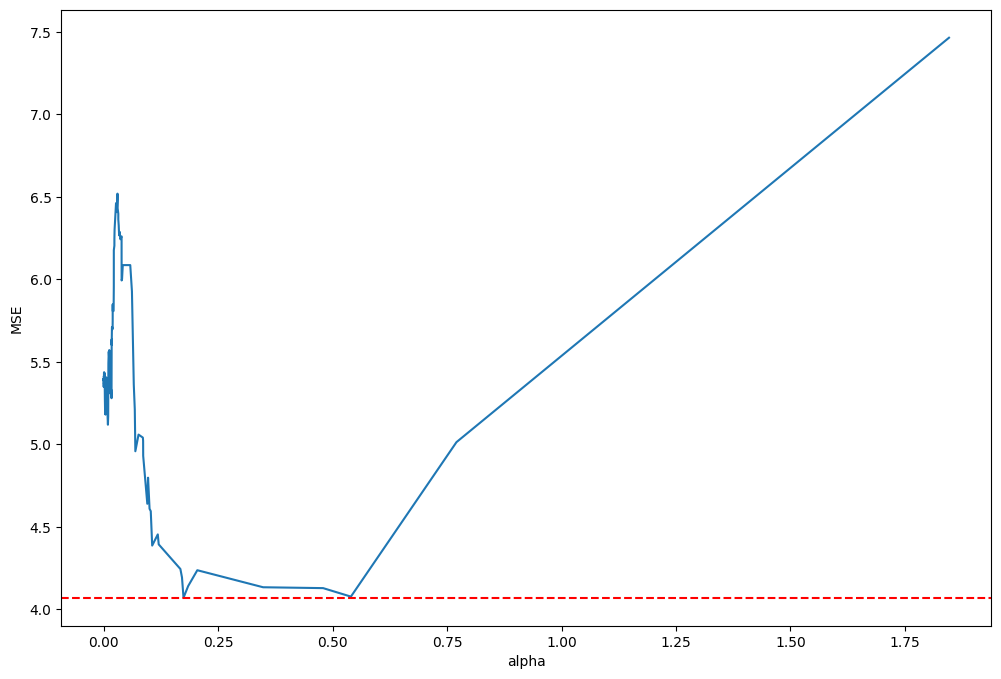

In [65]:
plotregressionTreeCV(X_train, X_test, y_train, y_test,ccp_path )

### (d) Use the bagging approach in order to analyze this data. What test MSE do you obtain? Use the feature_importance_ values to determine which variables are most important.

In [71]:
def bagging(X_train, X_test, y_train, y_test):
  carseat_bag = RF(n_estimators = 250, max_features = X_test.shape[1], random_state = 0).fit(X_train, y_train)
  mse_bag = np.mean((y_test - carseat_bag.predict(X_test))**2)
  return mse_bag, carseat_bag

In [72]:
mse_bag, carseat_bag = bagging(X_train, X_test, y_train, y_test)
mse_bag

(2.223778823568,
 array([0.09838016, 0.05391249, 0.0664195 , 0.03949498, 0.28451782,
        0.30502846, 0.10800254, 0.03248894, 0.00498213, 0.00677298]))

In [73]:
feature_importance = pd.Series(carseat_bag.feature_importances_, index = X_list).sort_values(ascending = False)
feature_importance

ShelveLoc      0.305028
Price          0.284518
Age            0.108003
CompPrice      0.098380
Advertising    0.066420
Income         0.053912
Population     0.039495
Education      0.032489
US             0.006773
Urban          0.004982
dtype: float64

In [74]:
# The most importance features are shelveLoc, Price, and Age

### (e) Use random forests to analyze this data. What test MSE do you obtain? Use the feature_importance_ values to determine which variables are most important. Describe the effect of m, the number of variables considered at each split, on the error rate obtained.

In [77]:
def randomForest(X_train, X_test, y_train, y_test):
  mse_rf_ = np.array([])
  for i in range(1, X_train.shape[1] + 1):
    carseat_rf = RF(n_estimators = 250, random_state = 0, max_features = i).fit(X_train, y_train)
    mse_rf = np.mean((y_test - carseat_rf.predict(X_test))**2)
    mse_rf_ = np.append(mse_rf_, mse_rf)
  return mse_rf_

In [78]:
mse_rf_ = randomForest(X_train , X_test, y_train, y_test)

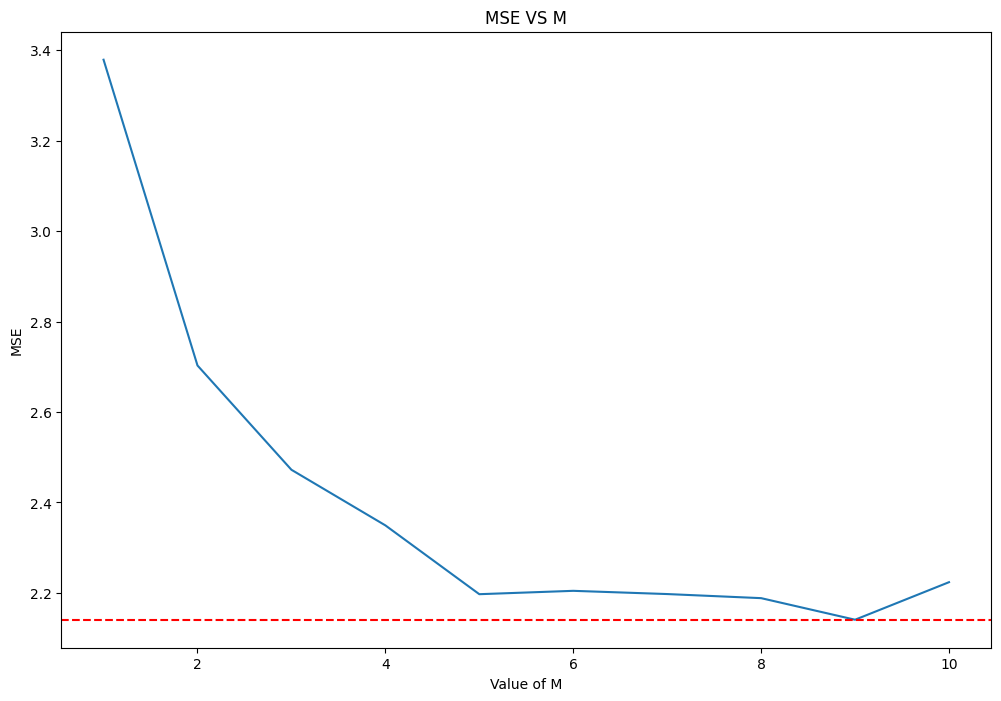

In [84]:
pd.Series(mse_rf_, index = np.arange(1, X_train.shape[1] + 1)).plot(figsize = (12,8))
plt.xlabel('Value of M')
plt.ylabel('MSE')
plt.title('MSE VS M')
plt.axhline(y = np.min(mse_rf_), color = 'red', linestyle = '--')
plt.show();

In [85]:
carseats_rf = RF(n_estimators = 250, max_features = np.argmin(mse_rf_) + 1, random_state = 0).fit(X_train, y_train)
feature_imp_ = pd.Series(carseats_rf.feature_importances_, index = X_list).sort_values(ascending = False)
feature_imp_

ShelveLoc      0.301691
Price          0.281479
Age            0.107380
CompPrice      0.097370
Advertising    0.068247
Income         0.056531
Population     0.042951
Education      0.032512
US             0.007389
Urban          0.004451
dtype: float64

In [86]:
# Looks like the same features are important of ShelveLoc, Price, and Age
print(min(mse_rf_))
# Our MSE did go down barley


2.1407846927519993


### (f) Now analyze the data using BART, and report your results.

In [87]:
carseats_bart = BART(random_state = 0, burnin = 50, ndraw = 200).fit(X_train, y_train)
mse_bart = np.mean((y_test - carseats_bart.predict(X_test))**2)
mse_bart

1.5231467800028722

In [88]:
# Bart performs the best so far then Random Forest, Bagging, and Regression Tree which we assumed from the lab and notes.

In [113]:
#Lets quickly check how boosting would have performed here
carseats_boost = GBR(random_state = 0, learning_rate = .2, n_estimators = 250).fit(X_train, y_train)
mse_boost = np.mean((y_test - carseats_boost.predict(X_test))**2)
mse_boost

1.9766964888421663

In [114]:
# As expected it performed better than random forest and bagging. We believed this since it learns successively and uses the orginial data rather than bootstraping it.
# We also expect BART to perform better than boosting since it is built on top of boosting with the addition of perturbing the trees

## Question 9. This problem involves the OJ data set which is part of the ISLP package.